## *Applications in Dynamical Systems*
# **Chaos in the asteroid belt**

  
#### Jules Stevenot and Titouan Alphonse, M2 CompuPhys
Due on January 18th, 2026

## 1. Introduction

The aim of this practical is to study the dynamics of the asteroid belt and understand chaos in the Solar system. The system we consider is composed of the 3 massive bodies: Sun, Jupiter and Saturn ; and several model asteroid (which will be called test particles) considered massless. More precisely, we want to study the impact of the massive objects on the test particles located in the asteroid belt (between 2 and 3.8 a.u.) through the various resonances and analyze their chaotic (or not) behaviors depending on their initial conditions (defined by their semi-major axis $a$ and their eccentrity $e$).

## 2. First exploration of the dynamics

In this part, we want to study the impact of the massive bodies on the dynamical behaviors of the test particles. In the Solar system, we expect some phenomena of resonances. More precisely, we expect the following main resonances of Jupiter:

- 3:1 at 2.5 a.u.
- 5:2 at 2.8 a.u.
- 7:3 at 2.95 a.u.
- 2:1 at 3.27 a.u.

This will lead to the formation of Kirkwood gaps that we can observe in the simulations. The impact of Saturn must also be considered: it could delete or shift some of the resonances.

To observe these phenomena, we integrate using the REBOUND package the Sun-Jupiter-Saturn system with 10,000 test particles for 1000 years. The test particles are spread evenly between 2 and 3.8 a.u., with random true anomalies between 0 and $2 \pi$ (so randomly positioned in the orbit) with an eccentricity of 0 (circular orbits). We gather the data (positions, velocities, semi-major axis and eccentricity) in arrays so we can access to the final eccentricity and semi-major axis for all test particles.

In [1]:
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

sim = rebound.Simulation()
sim.integrator = "whfast"
sim.units = ('AU', 'days', 'Msun')

# We can add Jupiter and four of its moons by name, since REBOUND is linked to the HORIZONS database.
labels = ["Sun","Jupiter","Saturn"]
sim.add(labels)
Ntest = 10000
a_init = np.linspace(2,3.8,Ntest)
for k in a_init:
    sim.add(a=k, f=2*np.pi*np.random.rand())
sim.N_active = len(labels)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')


In [2]:
t_max = 1000*365
sim.dt = 28
Nout=2
Nbodies=Ntest+sim.N_active
Times = np.linspace(0,t_max,Nout)

pos = np.zeros(shape=(Nbodies,Nout,3))
vit = np.zeros(shape=(Nbodies,Nout,3))
ecc = np.zeros(shape=(Nbodies,Nout))
semax = np.zeros(shape=(Nbodies,Nout))
ps = sim.particles

for i,time in enumerate(Times):
    sim.integrate(time)
    os = sim.orbits(primary=ps[0])
    for k, body in enumerate(ps):
        pos[k,i,0] = body.x
        pos[k,i,1] = body.y
        pos[k,i,2] = body.z

        vit[k,i,0] = body.vx
        vit[k,i,1] = body.vy
        vit[k,i,2] = body.vz
        
        if k != 0:
            ecc[k,i] = body.e
            semax[k,i] = body.a

That allows to plot the final eccentricity at the end of the integration with respect to the final semi-major axis:

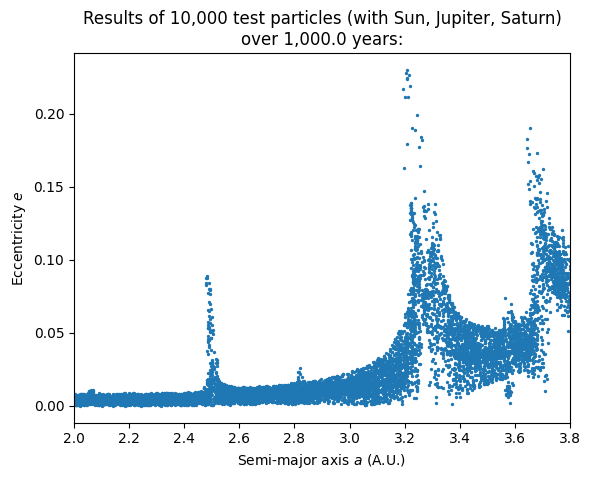

In [3]:
plt.scatter(semax[:,-1],ecc[:,-1], s=2)
plt.title(f"Results of {Ntest:,} test particles (with Sun, Jupiter, Saturn)\nover {t_max/365:,} years:")
plt.xlabel(r"Semi-major axis $a$ (A.U.)")
plt.ylabel(r"Eccentricity $e$")
plt.xlim(2,3.8)
plt.savefig("AvecSaturn.png")

We observe peaks of eccentricity for some values of $a$. More precisely, the major peaks are located at around 2.5 a.u., 3.3 a.u. and 3.7 a.u. with also smaller peaks at 2.8 a.u. and 3.6 a.u.  
In these areas, the eccentricities seem to diverge (with only 1000 years of integration), which corresponds to ejections of the test particles (eccentricty going to 1) $\rightarrow$ for longer integration times, there would be no particles at the semi-major axes associated to the peaks: it is the phenomenon of Kirkwood gaps. The peaks at 2.5 a.u., 2.8 a.u. and 3.3 a.u. can be identified as the 3:1, 5:2 and 2:1 resonances with Jupiter respectively. However, we observe some peaks which can't be explained using only Jupiter's dynamics (the presence of peaks at 3.6 a.u. or 3.7 and conversely the absence of 7:3 resonance). As said earlier, we could expect Saturn to influence the test-particle dynamics. Thus, in order to check that, we perform an integration in the exact same conditions but without Saturn.

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


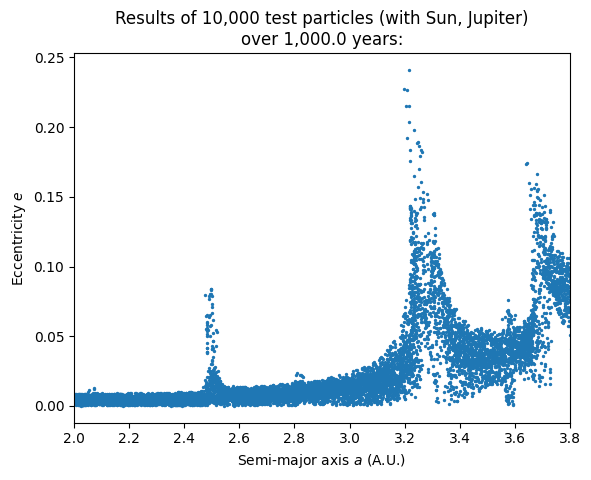

In [4]:
sim = rebound.Simulation()
sim.integrator = "whfast"
sim.units = ('AU', 'days', 'Msun')

# We can add Jupiter and four of its moons by name, since REBOUND is linked to the HORIZONS database.
labels = ["Sun","Jupiter"]
sim.add(labels)
Ntest = 10000
a_init = np.linspace(2,3.8,Ntest)
for k in a_init:
    sim.add(a=k, f=2*np.pi*np.random.rand())
sim.N_active = len(labels)

t_max = 1000*365
sim.dt = 28
Nout=2
Nbodies=Ntest+sim.N_active
Times = np.linspace(0,t_max,Nout)

pos = np.zeros(shape=(Nbodies,Nout,3))
vit = np.zeros(shape=(Nbodies,Nout,3))
ecc = np.zeros(shape=(Nbodies,Nout))
semax = np.zeros(shape=(Nbodies,Nout))
ps = sim.particles

for i,time in enumerate(Times):
    sim.integrate(time)
    os = sim.orbits(primary=ps[0])
    for k, body in enumerate(ps):
        pos[k,i,0] = body.x
        pos[k,i,1] = body.y
        pos[k,i,2] = body.z

        vit[k,i,0] = body.vx
        vit[k,i,1] = body.vy
        vit[k,i,2] = body.vz
        
        if k != 0:
            ecc[k,i] = body.e
            semax[k,i] = body.a

plt.scatter(semax[:,-1],ecc[:,-1], s=2)
plt.title(f"Results of {Ntest:,} test particles (with Sun, Jupiter)\nover {t_max/365:,} years:")
plt.xlabel(r"Semi-major axis $a$ (A.U.)")
plt.ylabel(r"Eccentricity $e$")
plt.xlim(2,3.8)
plt.savefig("SansSaturn.png")

We observe the exact same dynamics as before: no shifts, additions or suppressions of resonances. Indeed, the test-particles are located in the asteroid belt, thus, due to its distance and size, the interaction with Saturn can be considered as a second-order interaction in comparison to Jupiter. In the next simulation, only the Sun and Jupiter will therefore be used.

## 3. Lyapunov time

In this part, our goal is to determine the Lyapunov time of the asteroids in the asteroid belt. The Lyapunov time $T$ is defined as:

$$
T = \frac{1}{L}
$$

Where $L$ is the Maximal Lyapunov Exponent $L$ defined as:

$$
L = \lim_{t \rightarrow +\infty} \frac{1}{t} \frac{\| \delta \vec{p}(t), \delta \vec{q}(t) \|}{\| \delta \vec{p}(0), \delta \vec{q}(0) \|}
$$

Where $\delta \vec{p}$ and $\delta \vec{p}$ represent the divergence in position and velocity respectively between 2 nearby trajectories (or the tangential vector).

Instead of calculating directly $L$ using the previous formula, we use another chaos indactor: the Mean Exponential Growth of Nearby Orbits (or MEGNO). The MEGNO is defined as:

$$
Y(t) = \frac{2}{t} \int_{0}^{t} \frac{\dot{\delta}(\tau)}{\delta (\tau)} \tau d\tau
$$

From $Y(t)$, we can extract the time-averaged MEGNO expressed as:

$$
\bar{Y}(t) = \frac{2}{t}\int_{0}^{t}Y(\tau)d\tau
$$

$\bar{Y}(t)$ has the useful property that for quasi-periodic trajectories:

$$
\lim_{t \rightarrow + \infty}\bar{Y}(t) = 2
$$

And for chaotic trajectories:

$$
\lim_{t \rightarrow + \infty}\bar{Y}(t) \approx \frac{L}{2} t
$$

Calculating the MEGNO therefore gives the information about whether or not a trajectory is chaotic but also its Lyapunov time.

REBOUND allows to compute the MEGNO using the functions *init_megno()* and *megno()*. We use it to create a map of the MEGNO, after integrating over 500 years a system composed of the Sun, Jupiter and 1 test particle, with respect to the semi-major axis of the test particle $a \in [2.0, 3.8]$ a.u. and its eccentricity $e \in [0.0, 0.3]$. To do so, we create a function *simulation* which takes as parameters $a$ and $e$ and returns the MEGNO. In the next computations, the resolution will be set at $400 \times 400$ points on the map.

In [5]:
def simulation(par):
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    sim.units = ('AU', 'days', 'Msun')

    # We can add Jupiter and four of its moons by name, since REBOUND is linked to the HORIZONS database.
    sim.add(m=1)
    sim.add(m=0.0009543, a=5.20289, e=0.048)
    t_max = 500*365
    sim.dt = 28
    a, e = par # unpack parameters
    sim.ri_whfast.safe_mode = 0
    sim.add(m=0, a=a, e=e, f=np.random.rand()*2*np.pi)
    sim.move_to_com()
    
    sim.init_megno()
    sim.exit_max_distance = 20.
    try:
        sim.integrate(t_max, exact_finish_time=0) # integrate for 500 years, integrating to the nearest
        #timestep for each output to keep the timestep constant and preserve WHFast's symplectic nature
        megno = sim.megno() 
        return megno
    except rebound.Escape:
        return 10. # At least one particle got ejected, returning large MEGNO.

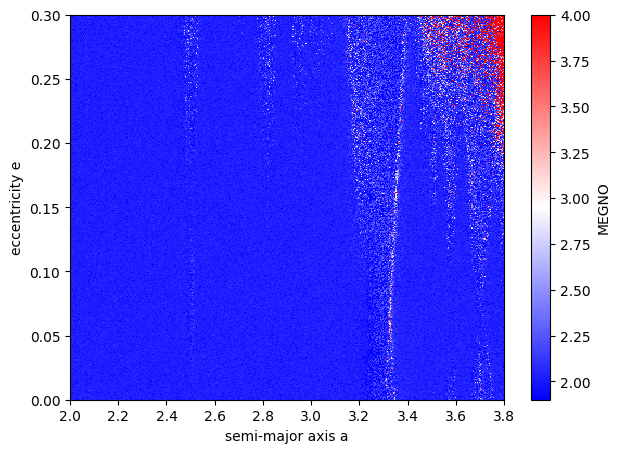

In [7]:
from multiprocess import Pool
with Pool() as pool:
    Ngrid = 400
    par_a = np.linspace(2,3.8,Ngrid)
    par_e = np.linspace(0.,0.3,Ngrid)
    parameters = []
    for e in par_e:
        for a in par_a:
            parameters.append((a,e))
    results = pool.map(simulation,parameters)

results2d = np.array(results).reshape(Ngrid,Ngrid)
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
extent = [min(par_a),max(par_a),min(par_e),max(par_e)]
ax.set_xlim(extent[0],extent[1])
ax.set_xlabel("semi-major axis a")
ax.set_ylim(extent[2],extent[3])
ax.set_ylabel("eccentricity e")
im = ax.imshow(results2d, interpolation="none", vmin=1.9, vmax=4, cmap="bwr", origin="lower", aspect='auto', extent=extent)
cb = plt.colorbar(im, ax=ax)
cb.set_label("MEGNO")

The blue area corresponds to quasi-periodic trajectories since the MEGNO has converged to 2. On the other hand, we can observe white and red areas where the MEGNO is strictly bigger than 2, which we will call chaotic areas. At high eccentricties, we find chaotic areas at $a=2.5$ a.u. and $a=2.8$ a.u. which can be identified as the 3:1 and 5:2 resonances with Jupiter but we also find a chaotic area between $a=2.9$ a.u. and $a=3.0$ a.u. which could correspond to the 7:3 resonance (which was not observed in the previous plots).

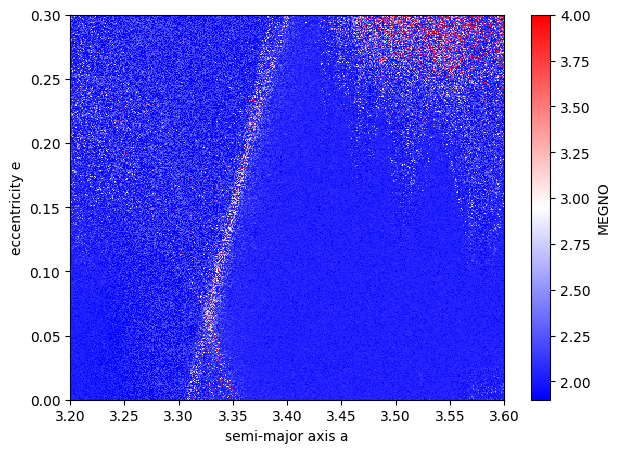

In [8]:
from multiprocess import Pool
with Pool() as pool:
    Ngrid = 400
    par_a = np.linspace(3.2,3.6,Ngrid)
    par_e = np.linspace(0.,0.3,Ngrid)
    parameters = []
    for e in par_e:
        for a in par_a:
            parameters.append((a,e))
    results = pool.map(simulation,parameters)

results2d = np.array(results).reshape(Ngrid,Ngrid)
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
extent = [min(par_a),max(par_a),min(par_e),max(par_e)]
ax.set_xlim(extent[0],extent[1])
ax.set_xlabel("semi-major axis a")
ax.set_ylim(extent[2],extent[3])
ax.set_ylabel("eccentricity e")
im = ax.imshow(results2d, interpolation="none", vmin=1.9, vmax=4, cmap="bwr", origin="lower", aspect='auto', extent=extent)
cb = plt.colorbar(im, ax=ax)
cb.set_label("MEGNO")

The 2:1 resonance located at 3.27 a.u. has much more amplitude, expanding to all $e \in [0.0, 0.3]$. More precisely, this chaotic area is composed of a large band for high eccentricities and a thiner tilted line across all eccentricites.  
We can finally observe a larger chaotic area at high eccentricities for $a \in [3.4, 3.8]$ a.u. and for which MEGNO is higher than in the others chaotic areas. This area is a more complex structure composed of several large peaks.

It can be noted that most of the chaotic areas are located at high semi-major axes, which was expected because of the closer distance to Jupiter. 

Now that we identified the different chaotic areas, we want to obtain the Lyapunov time for chaotic asteroids. Our method is to compute the MEGNO exactly as before for several integration time, so compute $\bar{Y}(t)$ for a system composed of the Sun, Jupiter and 1 asteroid with $a$ and $e$ parameters for several times $t$, and then compute the slop of the MEGNO with respect to time. If the trajectory is chaotic, the slope gives access to $\frac{L}{2}$ from which we can deduce the Lyapunov time.

However, even if chaotic areas have mostly choatic trajectories, it is possible to find periodic trajectories as seen on the top-right chaotic area displayed on the following plot.

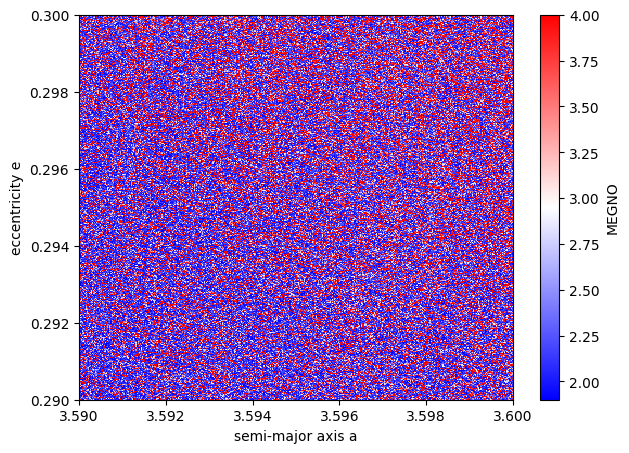

In [9]:
from multiprocess import Pool
with Pool() as pool:
    Ngrid = 400
    par_a = np.linspace(3.59,3.6,Ngrid)
    par_e = np.linspace(0.29,0.3,Ngrid)
    parameters = []
    for e in par_e:
        for a in par_a:
            parameters.append((a,e))
    results = pool.map(simulation,parameters)

results2d = np.array(results).reshape(Ngrid,Ngrid)
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
extent = [min(par_a),max(par_a),min(par_e),max(par_e)]
ax.set_xlim(extent[0],extent[1])
ax.set_xlabel("semi-major axis a")
ax.set_ylim(extent[2],extent[3])
ax.set_ylabel("eccentricity e")
im = ax.imshow(results2d, interpolation="none", vmin=1.9, vmax=4, cmap="bwr", origin="lower", aspect='auto', extent=extent)
cb = plt.colorbar(im, ax=ax)
cb.set_label("MEGNO")

The graph indeed looks like white noise which is expected in high chaotic distribution area of this phase-space.

Thus, to perform the Lyapunov time computation, we apply the previously described procedure for $400 \times 400$ particles whose semi-major axes are between 3.59 a.u. and 3.6 a.u. and eccentricities between 0.29 and 0.3 take the test particle (top-right part of the previous plots). We obtain the MEGNO with respect to time for several asteroid's initial orbital parameters.

In [10]:
def simulation2(par):
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    sim.units = ('AU', 'years', 'Msun')

    # We can add Jupiter and four of its moons by name, since REBOUND is linked to the HORIZONS database.
    sim.add(m=1)
    sim.add(m=0.0009543, a=5.20289, e=0.048)
    e,a,time = par # unpack parameters
    t_max = time
    sim.dt = 0.022
    sim.ri_whfast.safe_mode = 0
    sim.add(m=0, a=a, e=e)
    sim.move_to_com()
    
    sim.init_megno()
    sim.exit_max_distance = 20.
    try:
        sim.integrate(t_max, exact_finish_time=0) # integrate for 500 years, integrating to the nearest
        #timestep for each output to keep the timestep constant and preserve WHFast's symplectic nature
        megno = sim.megno() 
        return megno
    except rebound.Escape:
        return 10. # At least one particle got ejected, returning large MEGNO.

In [11]:
from multiprocess import Pool
with Pool() as pool:
    Ngrid = 2
    Timesteps = 100
    par_a = np.linspace(3.59,3.6,Ngrid)
    par_e = np.linspace(0.29,0.3,Ngrid)
    Time = np.linspace(1,50_000,Timesteps)
    parameters = []
    for e in par_e:
        for a in par_a:
            for t in Time:
                parameters.append((e,a,t))
    results = pool.map(simulation2,parameters)

Text(0.02, 0.5, 'MEGNO')

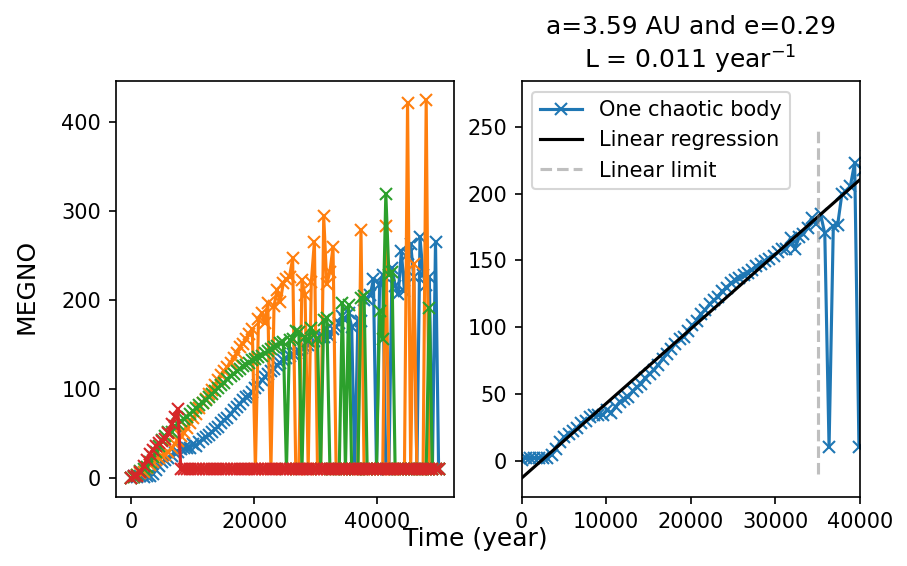

In [20]:
res = np.array(results).reshape(Ngrid,Ngrid,Timesteps)
fig, ax = plt.subplots(1,2, figsize=(1920/300, 1080/300), dpi=150)
for i in range(Ngrid):
    for j in range(Ngrid):
        ax[0].plot(Time, res[i,j,:], marker="x")
ax[1].plot(Time, res[0,0,:], marker="x", label="One chaotic body")
ax[1].set_xlim(0,40_000)

from scipy.optimize import curve_fit
def linear(x, a, b):
    return a*x + b

id = np.where(Time>=35_000)[0][0]
params, cov = curve_fit(linear, Time[:id], res[0,0,:id])
a,b = params
ax[1].plot(Time, a*Time+b, color="black", label="Linear regression")
ax[1].vlines(35000, -10, 250, ls="dashed", alpha=0.5, color="grey", label="Linear limit")
ax[1].set_title(f"a={par_a[0]} AU and e={par_e[0]}\nL = {2*a:.3f} "+r"year$^{-1}$")
ax[1].legend(loc="upper left")
fig.supxlabel("Time (year)")
fig.supylabel("MEGNO")

We indeed observe linear increase of the MEGNO with respect to time. However, for some trajectories, the MEGNO falls to a value close to 2 or starts oscillating between 2 and a linear increase. This may be explained by some catches of the asteroids by Jupiter.

In order to compute the Lyapunov time of one of the asteroids, we select only the part where the MEGNO is linearly increasing (visually represented by the dotted line, the linear regression is applied from 0 to 35,000 years), and we fit an affine law to obtain the slope. In this case, we obtain a Lyapunov exponent of 0.011 years $^{-1}$, which gives a Lyapunov time of approximately 90.9 years. We obtain a signicantly smaller Lyapunov time than for (36) Atalante (located at 2.7 a.u.) which is 4000 years. However, this can be explained by the choice of the chaotic area: the MEGNO of the right part of the maps displayed earlier (where our asteroid is) seems to increase significantly quicker than for the left part (where (36) Atalante is).

## 4. Conclusion

During this practical, we performed several kind of integrations using the REBOUND package to study the dynamics of the asteroid belt when it is influenced by the Sun, Jupiter and Saturn. From these integrations, we obtained some informations about the final eccentricity with respect to the semi-major axis or the MEGNO of the systems. Both observables highlighted the phenomenon of resonance: the first from the formed Kirkwood gaps and the second from the chaotic trajectories near the resonance. Using both methods was particularily interesting since some resonances identified using the MEGNO could not be seen on the eccentricity with respect to the semi-major axis plots.

Finally, fitting the evolution of the MEGNO with respect to the time allowed us to compute the Lyapunov time of an asteroid located in $a \in [3.58, 3.60]$ a.u., $e \in [0.29, 0.30]$. A way to push the results further would be to perform the same computations for $a \in [2.0, 3.6]$ a.u., $e \in [0.0, 0.3]$ and thus map the Lyapunov time for the whole asteroid belt.